In [3]:
import pandas as pd
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('IMDB Dataset.csv')

# Print the first few rows
print(df.head())

# Get some basic information about the dataset
print(df.info())

# Check the distribution of sentiment labels
print(df['SENTIMENT'].value_counts()) # Replace 'sentiment_column_name'

                                             REVIEWS SENTIMENT  Unnamed: 2  \
0  One of the other reviewers has mentioned that ...  positive         NaN   
1  A wonderful little production.   The filming t...  positive         NaN   
2  I thought this was a wonderful way to spend ti...  positive         NaN   
3  Basically there's a family where a little boy ...  negative         NaN   
4  Petter Mattei's "Love in the Time of Money" is...  positive         NaN   

   Unnamed: 3  Unnamed: 4  Unnamed: 5  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
2         NaN         NaN         NaN  
3         NaN         NaN         NaN  
4         NaN         NaN         NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50824 entries, 0 to 50823
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   REVIEWS     50824 non-null  object 
 1   SENTIMENT   50824 non-null  object 
 2   Unnamed: 2  0 

In [4]:
df['REVIEWS'] = df['REVIEWS'].str.lower() # Replace 'review_text_column'

In [6]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
df['REVIEWS'] = df['REVIEWS'].apply(remove_punctuation)

In [7]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)
df['REVIEWS'] = df['REVIEWS'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
def tokenize_text(text):
    return word_tokenize(text)
df['TOKENISED REVIEWS'] = df['REVIEWS'].apply(tokenize_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]
df['LEMMATISED REVIEWS'] = df['TOKENISED REVIEWS'].apply(lemmatize_words)

# If you choose stemming instead:
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# def stem_words(tokens):
#     return [stemmer.stem(token) for token in tokens]
# df['stemmed_review'] = df['tokenized_review'].apply(stem_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [16]:
def join_tokens(tokens):
    return " ".join(tokens)

df['PROCESSED TEXT'] = df['LEMMATISED REVIEWS'].apply(join_tokens) # Or df['stemmed_review'], etc.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['PROCESSED TEXT']) # Use the column with joined tokens
y = df['SENTIMENT']

print(X.shape)

(50824, 162614)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['PROCESSED TEXT'])
y = df['SENTIMENT']

print(X.shape)

(50824, 162614)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8691588785046729
Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.88      0.87      5067
    positive       0.88      0.86      0.87      5098

    accuracy                           0.87     10165
   macro avg       0.87      0.87      0.87     10165
weighted avg       0.87      0.87      0.87     10165



In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100000) # Increase max_iter if it doesn't converge
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8972946384653222
Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.89      0.90      5067
    positive       0.89      0.91      0.90      5098

    accuracy                           0.90     10165
   macro avg       0.90      0.90      0.90     10165
weighted avg       0.90      0.90      0.90     10165



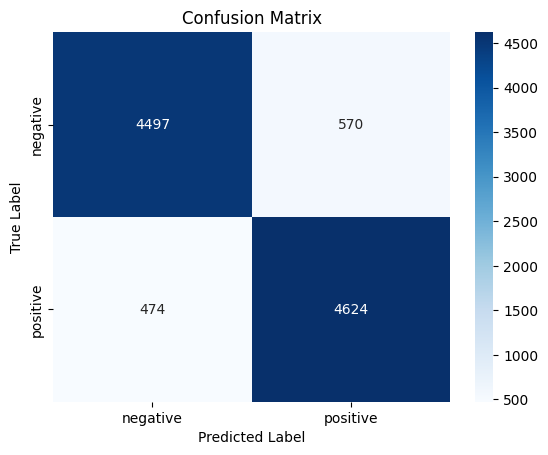

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [24]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.902803738317757
Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.90      0.90      5067
    positive       0.90      0.91      0.90      5098

    accuracy                           0.90     10165
   macro avg       0.90      0.90      0.90     10165
weighted avg       0.90      0.90      0.90     10165



In [25]:
import joblib

# Save the trained model
joblib.dump(model, 'IMDB REVIEWS sentiment_analysis_model.pkl')

# Save the vectorizer as well, as you'll need it to preprocess new data
joblib.dump(vectorizer, 'IMDB REVIEWS sentiment_vectorizer.pkl')

# To load the model later:
loaded_model = joblib.load('IMDB REVIEWS sentiment_analysis_model.pkl')
loaded_vectorizer = joblib.load('IMDB REVIEWS sentiment_vectorizer.pkl')

# Now you can use loaded_model.predict() on new, vectorized data

In [27]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

def preprocess_text(text):
    text = text.lower()
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text) # Or use stemming if you did that before
    return text
preprocessed_new_reviews = [preprocess_text(review) for review in new_reviews] # Assuming you have a preprocess_text function

In [28]:
new_reviews = ["This is a fantastic product, I highly recommend it!",
               "The worst experience ever. Absolutely terrible.",
               "It was okay, nothing to write home about."]

preprocessed_new_reviews = [preprocess_text(review) for review in new_reviews]

new_X = loaded_vectorizer.transform(preprocessed_new_reviews)
predictions = loaded_model.predict(new_X)

for review, prediction in zip(new_reviews, predictions):
    print(f"Review: '{review}' - Predicted Sentiment: {prediction}")

Review: 'This is a fantastic product, I highly recommend it!' - Predicted Sentiment: positive
Review: 'The worst experience ever. Absolutely terrible.' - Predicted Sentiment: negative
Review: 'It was okay, nothing to write home about.' - Predicted Sentiment: negative
